In [76]:
import numpy as np
import pandas as pd
# 모든 시트 취득
df_sheet = pd.read_excel('C:/My_Python/code.xlsx', engine='openpyxl')
print(df_sheet_all)
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

{'Sheet1':       no  교통  학교  공공  생활  조망  녹지  조망.1  쾌적성  차량  ...  현거주  성별  연령  직업  학력  결혼  \
0      1   7   7   7   5   7   5     5    7   6  ...    6   2   1   4   4   2   
1      2   6   6   6   5   6   5     7    7   6  ...    6   1   5   3   4   1   
2      3   6   7   6   6   6   3     6    6   6  ...    6   1   3   3   2   1   
3      4   7   6   7   5   6   6     4    5   5  ...    6   2   1   4   4   2   
4      5   4   5   5   4   4   5     5    5   4  ...    6   2   1   4   4   2   
..   ...  ..  ..  ..  ..  ..  ..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ..   
625  626   6   7   6   6   6   3     6    6   6  ...    6   2   3   3   2   1   
626  627   7   6   7   5   6   6     4    5   5  ...    6   2   2   7   4   1   
627  628   4   5   5   4   4   5     5    5   4  ...    6   2   2   5   3   1   
628  629   6   7   7   7   7   7     7    7   7  ...    6   2   2   7   4   1   
629  630   6   7   7   6   7   7     5    7   7  ...    4   2   3   1   2   1   

     어느나라  연수입  

In [34]:
print('데이터셋 크기: ', df_sheet.shape)
df_sheet.head()

데이터셋 크기:  (360, 23)


,no,대중교통,통근거리,공공시설,편의시설,교육시설,녹지공간,일조조망,쾌적성,재해안전,...,택배편리,주택가격,주거비용,생활물가,교통비용,주민친밀,모임활성,지역위상,지역복지,전반만족
0,612,3,4,6,5,4,4,3,4,4,...,4,3,3,2,4,3,3,3,4,4
1,622,3,4,6,5,4,4,3,4,4,...,4,3,3,2,4,3,3,3,4,4
2,19,7,5,6,7,7,5,6,6,6,...,7,5,4,6,6,4,6,6,5,6
3,102,7,5,6,7,7,5,6,6,6,...,7,5,4,6,6,4,6,6,5,6
4,517,7,5,6,7,7,5,6,6,6,...,7,5,4,6,6,4,6,6,5,6


In [35]:
df_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   no      360 non-null    int64
 1   대중교통    360 non-null    int64
 2   통근거리    360 non-null    int64
 3   공공시설    360 non-null    int64
 4   편의시설    360 non-null    int64
 5   교육시설    360 non-null    int64
 6   녹지공간    360 non-null    int64
 7   일조조망    360 non-null    int64
 8   쾌적성     360 non-null    int64
 9   재해안전    360 non-null    int64
 10  주택크기    360 non-null    int64
 11  방등개수    360 non-null    int64
 12  유틸리티    360 non-null    int64
 13  택배편리    360 non-null    int64
 14  주택가격    360 non-null    int64
 15  주거비용    360 non-null    int64
 16  생활물가    360 non-null    int64
 17  교통비용    360 non-null    int64
 18  주민친밀    360 non-null    int64
 19  모임활성    360 non-null    int64
 20  지역위상    360 non-null    int64
 21  지역복지    360 non-null    int64
 22  전반만족    360 non-null    int64
dtypes: int64(23)
me

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
Y = df_sheet['주택가격']
X = df_sheet.drop(['주택가격'], axis = 1, inplace = False)

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train, Y_train)

LinearRegression()

In [65]:
Y_predict = lr.predict(X_test)

In [66]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 0.156, RMSE : 0.395598
R^2(Variance score) : 0.945


In [67]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  1.12
회귀 계수 값:  [ 0.    0.07 -0.07 -0.18  0.16 -0.61 -0.17  0.11  0.08  0.41 -0.51  0.69
  0.23 -0.24  0.22  0.94  0.05  0.16 -0.45  0.19 -0.26 -0.05]


In [68]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

생활물가    0.94
방등개수    0.69
재해안전    0.41
유틸리티    0.23
주거비용    0.22
지역위상    0.19
주민친밀    0.16
편의시설    0.16
일조조망    0.11
쾌적성     0.08
대중교통    0.07
교통비용    0.05
no      0.00
전반만족   -0.05
통근거리   -0.07
녹지공간   -0.17
공공시설   -0.18
택배편리   -0.24
지역복지   -0.26
모임활성   -0.45
주택크기   -0.51
교육시설   -0.61
dtype: float64

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

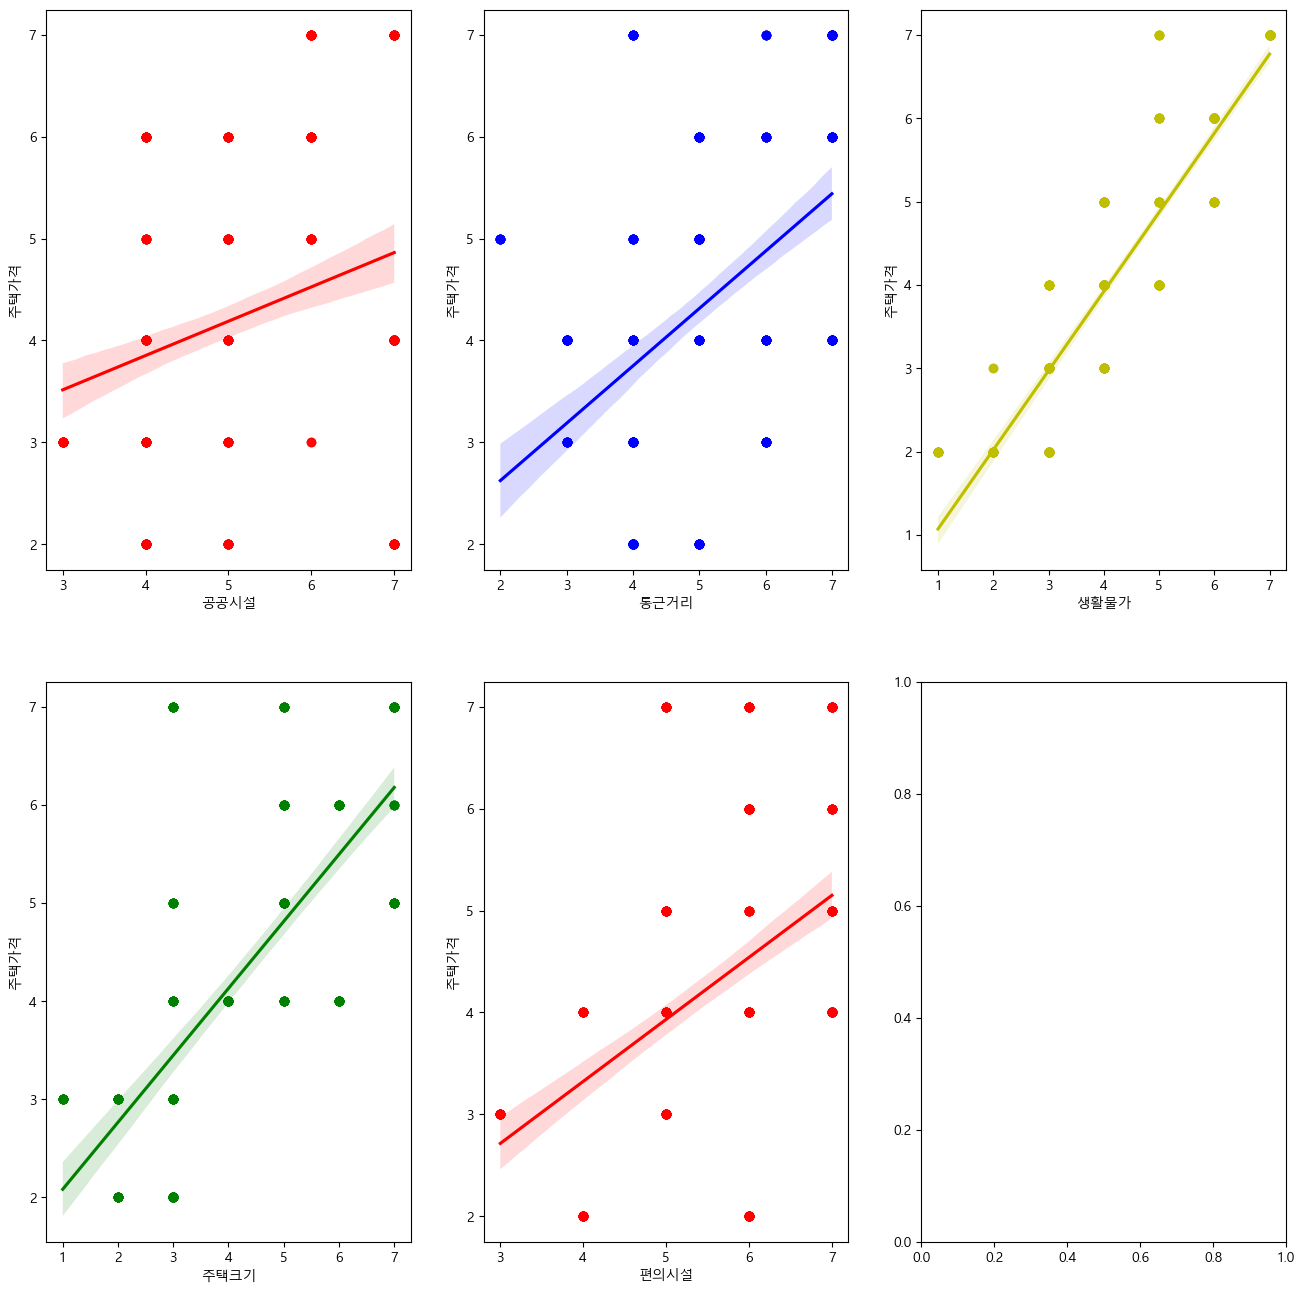

In [71]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ['공공시설', '통근거리', '생활물가', '주택크기', '편의시설']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = '주택가격', data = df_sheet, ax = axs[row][col], color = plot_color[i])